In [16]:
# pip install matplotlib seaborn
#左半邊：400
#右半邊：1200

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料集
data_name = 'data-8'
data = pd.read_csv(f'Data/recorded_{data_name}.txt', sep='\t')

data['time'] = pd.to_datetime(data['time'])
data['time'] = data['time'].dt.strftime('%H:%M:%S')
data_subset = data.iloc[100:]
data_subset = data_subset.loc[(data_subset['scroll_x'] >= 0) & (data_subset['scroll_y'] >= 0) & (data_subset['scroll_x'] <= 1600)]

data_subset.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 100 to 681
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        554 non-null    object 
 1   position_x  554 non-null    float64
 2   position_y  554 non-null    float64
 3   scroll_x    554 non-null    float64
 4   scroll_y    554 non-null    float64
dtypes: float64(4), object(1)
memory usage: 26.0+ KB


,time,position_x,position_y,scroll_x,scroll_y
0,07:58:09,502.332872,494.334404,502.332872,494.334404
1,07:58:08,505.996430,484.978541,505.996430,484.978541
2,07:58:09,524.681450,465.737187,524.681450,465.737187
3,07:58:09,549.634520,466.539587,549.634520,466.539587
4,07:58:09,554.286382,352.915619,554.286382,352.915619


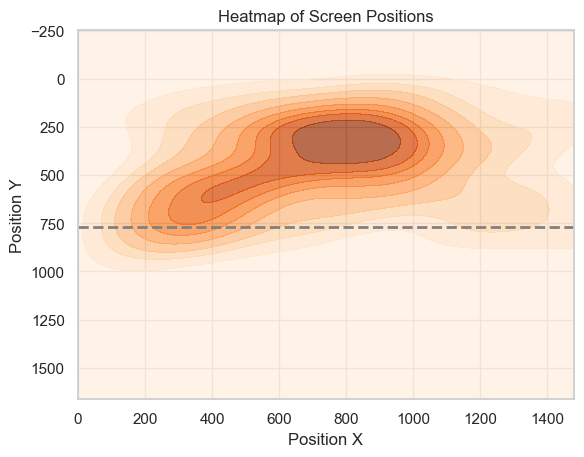

In [6]:
# 創建 2D 密度圖
ax1 = sns.kdeplot(x=data_subset['scroll_x'], y=data_subset['scroll_y'], cmap="Oranges", fill=True, thresh=0, levels=10, alpha=0.7)

# 加入軸標籤和標題
ax1.set_xlabel('Position X')
ax1.set_ylabel('Position Y')
ax1.set_title('Heatmap of Screen Positions')
ax1.invert_yaxis()

plt.xlim(0, 1480)
plt.axhline(y=768, color='grey', linewidth=2, linestyle='--')

filename = f'heatmap1_{data_name}.png'
plt.savefig(filename, transparent=True)
# 顯示圖形
plt.show()

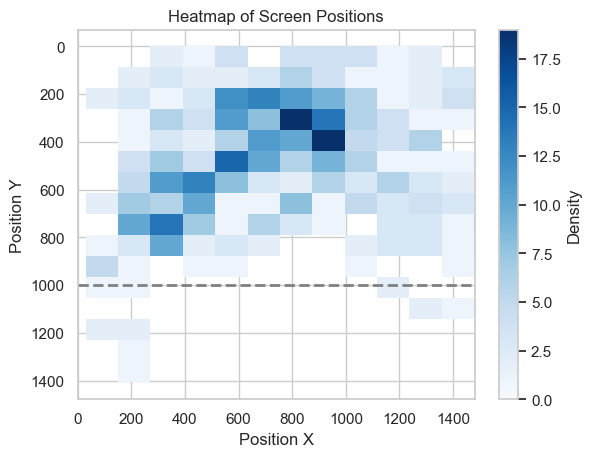

In [4]:
# 設定圖形的風格
sns.set_theme(style="whitegrid")

# 創建邊線柱狀圖
ax = sns.histplot(data_subset, x='scroll_x', y='scroll_y', cbar=True, cmap="Blues", cbar_kws={'label': 'Density'})

# 加入軸標籤和標題
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_title('Heatmap of Screen Positions')
ax.invert_yaxis()

# 設置背景色為透明
ax.set_facecolor("none")
plt.xlim(0, 1480)
plt.axhline(y=768, color='grey', linewidth=2, linestyle='--')

filename = f'heatmap2_{data_name}.png'
plt.savefig(filename, transparent=True)
# 顯示圖形
plt.show()

In [5]:
#13
#24

area_1 = 0
area_2 = 0
area_3 = 0
area_4 = 0

# 根據條件計算區域次數
for index, row in data_subset.iterrows():
    if 0 <= row['scroll_x'] <= 100 and 0 <= row['scroll_y'] <= 250:
        area_1 += 1
    elif 0 <= row['scroll_x'] <= 100 and row['scroll_y'] > 250:
        area_2 += 1
    elif 1380 <= row['scroll_x'] <= 1480 and 0 <= row['scroll_y'] <= 250:
        area_3 += 1
    elif 1380 <= row['scroll_x'] <= 1480 and row['scroll_y'] > 250:
        area_4 += 1

# 比較四個區域的計數
order = sorted([(area_1, 1), (area_2, 2), (area_3, 3), (area_4, 4)], reverse=True)

# 回傳順序
result_order = [area[1] for area in order]
print("Area 1 Count:", area_1)
print("Area 2 Count:", area_2)
print("Area 3 Count:", area_3)
print("Area 4 Count:", area_4)
print("區域順序:", result_order)

Area 1 Count: 2
Area 2 Count: 3
Area 3 Count: 7
Area 4 Count: 7
區域順序: [4, 3, 2, 1]
